#NGC 5

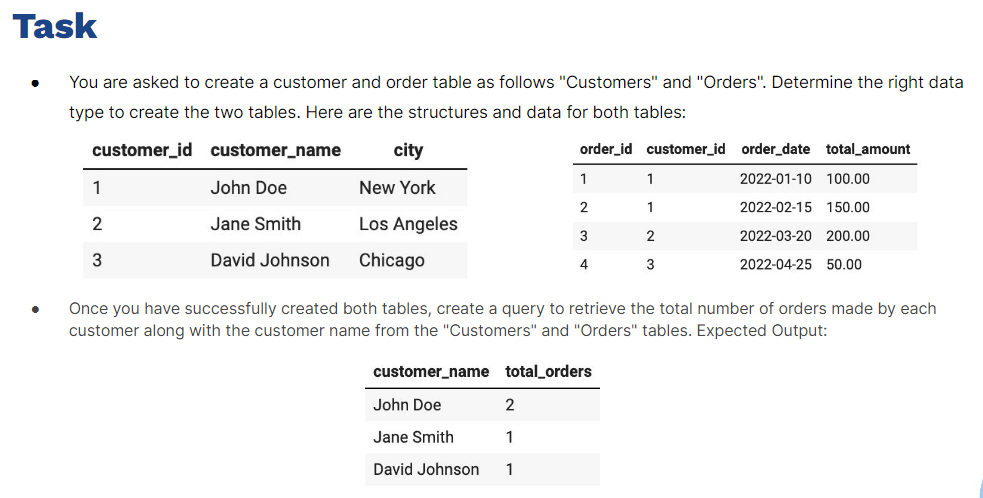

##Jawaban

```sql
--bikin tabel pertama namanya Customers
create table Customers (
	customer_id serial primary key,
	customer_name varchar,
	city varchar
)
;

insert into Customers (customer_id, customer_name, city)
values
	(1, 'John Doe', 'New York'),
	(2, 'Jane Smith', 'Los Angeles'),
	(3, 'David Johnson', 'Chicago');

--ganti type data soalnya saya salah input
alter table Customers
alter column customer_name type char(50),
alter column city type char(50);

--bikin tabel kedua namanya Orders
create table Orders(
	order_id int,
	customer_id serial primary key,
	order_date date,
	total_amount float
)
;

insert into Orders (order_id, customer_id, order_date, total_amount)
values
	(1, 1, '2022-01-10', 100),
	(2, 1, '2022-02-15', 150),
	(3, 2, '2022-03-20', 200),
	(4, 3, '2022-04-25', 50);

-- membuat query yang mengeluarkan total number of orders dari setiap customer dengan nama customernya.

select c.customer_name, count(o.order_id) as total_orders
from Customers as c
join Orders as o on c.customer_id = o.customer_id
group by c.customer_name
order by c.customer_name desc
;
```

Output

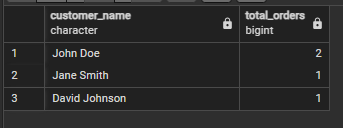

#NGC 6

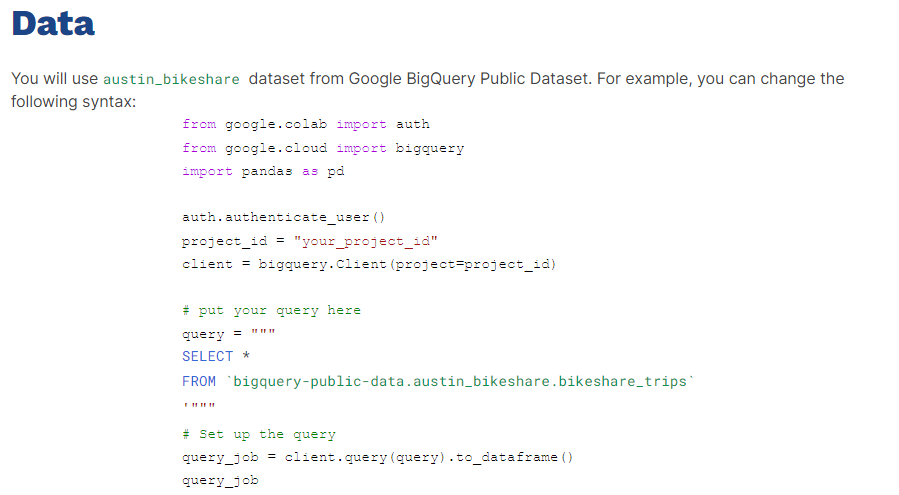

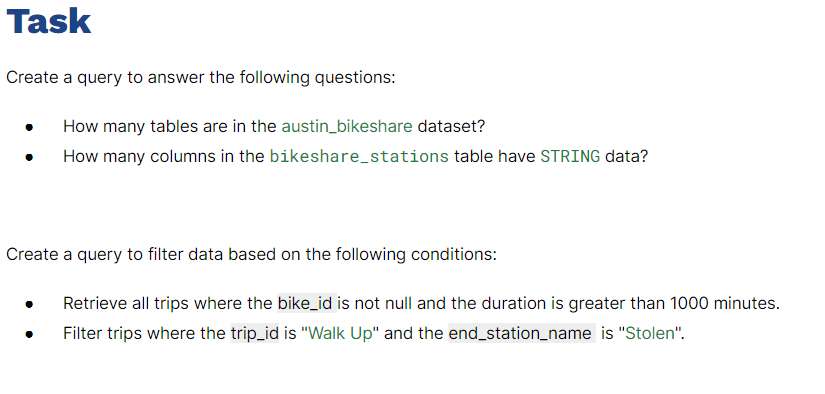

##Jawaban

##Importing bigquery to colab

In [ ]:
from google.colab import auth
from google.cloud import bigquery
import pandas as pd

auth.authenticate_user()
project_id = "root-smile-294719"
client = bigquery.Client(project=project_id)

##How many tables are in austin_bikeshare dataset?

```sql
select count(*) as number_of_tables
from `bigquery-public-data.austin_bikeshare`.INFORMATION_SCHEMA.TABLES;
```

In [ ]:
query = '''select count(*) as number_of_tables
from `bigquery-public-data.austin_bikeshare`.INFORMATION_SCHEMA.TABLES;'''
query_job = client.query(query).to_dataframe()
query_job

,number_of_tables
0,2


##How many columns are in bikeshare_stations table have STRING data?

```sql
select count(*) as num_of_columns
from `bigquery-public-data.austin_bikeshare`.INFORMATION_SCHEMA.COLUMNS
where table_name = 'bikeshare_stations' and data_type = STRING
```

In [ ]:
query = '''select count(*) as num_of_columns
from `bigquery-public-data.austin_bikeshare`.INFORMATION_SCHEMA.COLUMNS
where table_name = "bikeshare_stations" and data_type = 'STRING'  '''
query_job = client.query(query).to_dataframe()
query_job

,num_of_columns
0,7


##Retrieve all trips where the **bike_id** is not null and the duration is greater than 1000 minutes.

```sql
select *
from `bigquery-public-data.austin_bikeshare.bikeshare_trips`
where bike_id is not null and duration_minutes > 1000
limit 5
```

In [ ]:
query = '''select *
from `bigquery-public-data.austin_bikeshare.bikeshare_trips`
where bike_id is not null and duration_minutes > 1000
limit 5  '''
query_job = client.query(query).to_dataframe()
query_job

,trip_id,subscriber_type,bike_id,bike_type,start_time,start_station_id,start_station_name,end_station_id,end_station_name,duration_minutes
0,29731917,24 Hour Walk Up Pass,21457,electric,2023-05-27 10:47:04+00:00,3791,Lake Austin/Enfield,3791,Lake Austin/Enfield,1407
1,29731920,24 Hour Walk Up Pass,21803,electric,2023-05-27 10:47:20+00:00,3791,Lake Austin/Enfield,3791,Lake Austin/Enfield,1407
2,29554935,Pay-as-you-ride,21454,electric,2023-05-07 11:44:09+00:00,4048,South Congress @ Bouldin Creek,4048,South Congress @ Bouldin Creek,1231
3,30391277,Local31,23277,electric,2023-07-30 11:23:37+00:00,3794,4th/Sabine,3794,23rd/Pearl,1281
4,30163408,24 Hour Walk Up Pass,2887,classic,2023-07-08 23:42:32+00:00,3794,4th/Sabine,3794,Electric Drive/Sandra Muraida Way @ Pfluger Pe...,4263


##Filter trips where the trip_id is "Walk Up" and the end_station_name  is "Stolen".

```sql
select *
from `bigquery-public-data.austin_bikeshare.bikeshare_trips`
where lower(subscriber_type) like '%walk up%' and end_station_name = 'Stolen'
limit 5
```

In [ ]:
query = '''select *
from `bigquery-public-data.austin_bikeshare.bikeshare_trips`
where lower(subscriber_type) like '%walk up%' and end_station_name = 'Stolen'
limit 5  '''
query_job = client.query(query).to_dataframe()
query_job

,trip_id,subscriber_type,bike_id,bike_type,start_time,start_station_id,start_station_name,end_station_id,end_station_name,duration_minutes
0,3857350,24 Hour Walk Up Pass,488,classic,2015-01-25 03:09:23+00:00,2545,ACC - Rio Grande & 12th,None,Stolen,3193
1,7486759,24 Hour Walk Up Pass,439,classic,2015-11-01 02:02:28+00:00,2496,8th/Congress,None,Stolen,6609
2,13555129,Walk Up,578,classic,2017-01-27 01:35:26+00:00,2498,Convention Center / 4th St. @ MetroRail,None,Stolen,5189
3,3985730,24 Hour Walk Up Pass,875,classic,2015-02-21 13:33:16+00:00,2536,Waller & 6th St.,None,Stolen,412
4,4050430,24 Hour Walk Up Pass,223,classic,2015-03-07 09:27:43+00:00,2537,6th/West,None,Stolen,250


atau

```sql
select *
from `bigquery-public-data.austin_bikeshare.bikeshare_trips`
where lower(subscriber_type) = 'Walk Up' and end_station_name = 'Stolen'
limit 5
```